In [4]:
#########1.Describe statistical information of the dataset features.
#What is population?
# A population is the collection of all outcomes,responses,measurements or counts that are of interest

# What is a sample?
# A sample is a subset or part of the population.


In [7]:
df=pd.read_csv('/Users/apple/documents/GeetaChoudhary/extra/archive (7)/global-hunger-index.csv')
df

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN
...,...,...,...,...,...
466,Yemen,YEM,2006,38.8,NaN
467,Yemen,YEM,2012,38.4,NaN
468,Yemen,YEM,2021,45.1,NaN
469,Zambia,ZMB,2021,27.5,Value represents the mid-point of its group in...


In [8]:
df.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [9]:
df.tail()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
466,Yemen,YEM,2006,38.8,NaN
467,Yemen,YEM,2012,38.4,NaN
468,Yemen,YEM,2021,45.1,NaN
469,Zambia,ZMB,2021,27.5,Value represents the mid-point of its group in...
470,Zimbabwe,ZWE,2021,27.5,Value represents the mid-point of its group in...


In [10]:
####2.Check on missing values and anomolies in the dataset. 
#Remove outliers and fix discrepencies in the datasat if present any 
#using appropriate statistical techniques. Make observations for the same.


In [11]:
df.shape

(471, 5)

In [12]:
df.dtypes

Entity                         object
Code                           object
Year                            int64
Global Hunger Index (2021)    float64
411773-annotations             object
dtype: object

In [13]:
df.isnull().any()

Entity                        False
Code                          False
Year                          False
Global Hunger Index (2021)    False
411773-annotations             True
dtype: bool

In [14]:
df.isnull().sum()

Entity                          0
Code                            0
Year                            0
Global Hunger Index (2021)      0
411773-annotations            459
dtype: int64

In [15]:
df.fillna(0,inplace=True)

In [16]:
df['411773-annotations'].isnull().any()

False

In [17]:
df['411773-annotations'].unique()

array([0,
       'Value represents the mid-point of its group in the GHI severity scale'],
      dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      471 non-null    object 
 1   Code                        471 non-null    object 
 2   Year                        471 non-null    int64  
 3   Global Hunger Index (2021)  471 non-null    float64
 4   411773-annotations          471 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.5+ KB


In [19]:
df.describe()

,Year,Global Hunger Index (2021)
count,471.000000,471.000000
mean,2010.127389,19.824628
std,7.852951,13.449570
min,2000.000000,2.500000
25%,2006.000000,8.800000
50%,2012.000000,17.000000
75%,2021.000000,28.550000
max,2021.000000,65.100000


In [20]:
df.isnull().sum()

Entity                        0
Code                          0
Year                          0
Global Hunger Index (2021)    0
411773-annotations            0
dtype: int64

/var/folders/rr/88ggfs5x1rn2hb7hryjtnk680000gn/T/ipykernel_1746/2115624055.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global Hunger Index (2021)'])


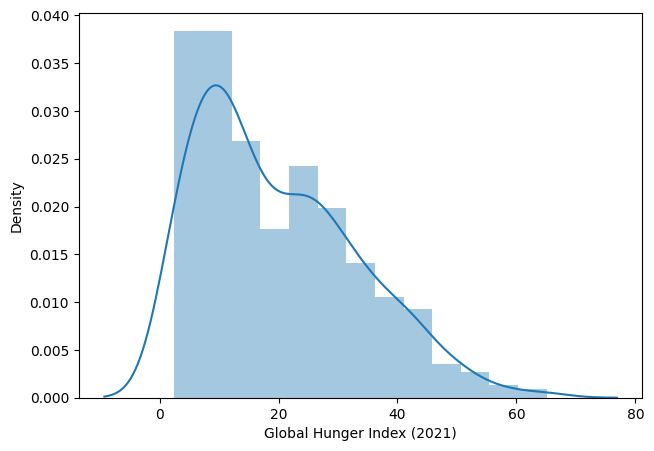

In [21]:
###outlier dedection and removes it
###
# def plotvariable(df,variable):
plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(df['year'])
    
plt.subplot(1,2,2)
sns.distplot(df['Global Hunger Index (2021)'])
plt.show()

# plt.subplot(1,2,2)
# sns.displot(df['Global Hunger Index (2021)'])
# plt.show()

# plt.subplot(1,2,2)
# sns.histplot(df['Global Hunger Index (2021)'])
# plt.show()



<AxesSubplot: >

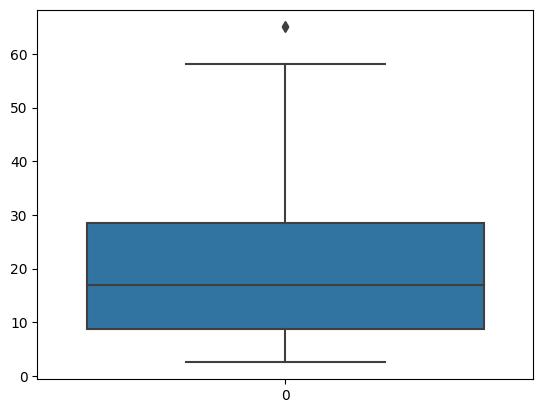

In [22]:
sns.boxplot(df['Global Hunger Index (2021)'])

In [23]:
df['Global Hunger Index (2021)'].describe()

count    471.000000
mean      19.824628
std       13.449570
min        2.500000
25%        8.800000
50%       17.000000
75%       28.550000
max       65.100000
Name: Global Hunger Index (2021), dtype: float64

In [24]:
#finding IQR
percentile25=df['Global Hunger Index (2021)'].quantile(0.25)
percentile75=df['Global Hunger Index (2021)'].quantile(0.75)


In [25]:
percentile25

8.8

In [26]:
percentile75

28.55

In [27]:
iqr = (percentile75-percentile25)
print(iqr)

19.75


In [28]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [29]:
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 58.175
lower_limit -20.825


In [30]:
##finding outlier
df[df['Global Hunger Index (2021)']>upper_limit]
# this will include data points which are not outliers 

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
12,Angola,AGO,2000,65.0,0
394,Somalia,SOM,2012,65.1,0


In [31]:
df[df['Global Hunger Index (2021)']<lower_limit]

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations


In [32]:

 
df_no_outlier=df[df['Global Hunger Index (2021)']<upper_limit]


In [33]:
df_no_outlier.shape

(469, 5)

/var/folders/rr/88ggfs5x1rn2hb7hryjtnk680000gn/T/ipykernel_1746/4177889443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outlier['Global Hunger Index (2021)'])


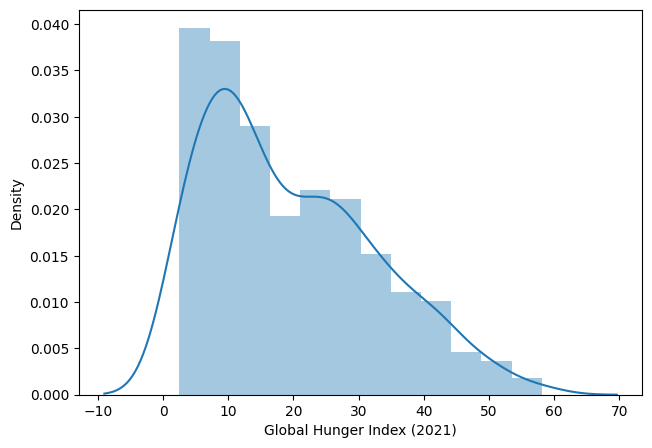

<AxesSubplot: >

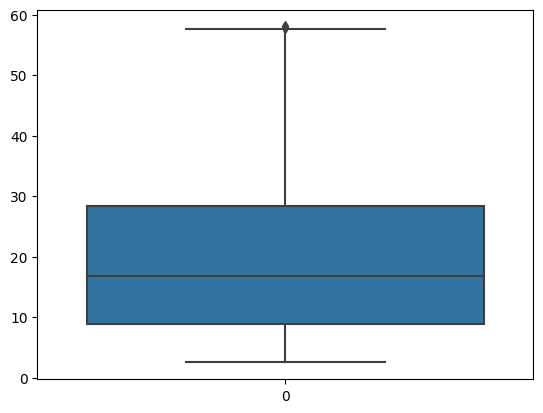

In [34]:
plt.figure(figsize=(16,5))   
plt.subplot(1,2,2)
sns.distplot(df_no_outlier['Global Hunger Index (2021)'])
plt.show()



sns.boxplot(df_no_outlier['Global Hunger Index (2021)'])

In [289]:
###### 3.Perform univariant,bivariant and multivariant analysis 
# and make observations(include visuals). 
#
#
#UNIVARIANT ANALYSIS

# Univariant analysis, for numeric data types use distplot(histogram)
#and for categorical data types use countplot



In [39]:
plt.hist(df.Global Hunger Index,bins=20,rwidth=0.8)
plt.xlabel('Global Hunger Index (2021)')
plt.ylabel('Count')
plt.show()

SyntaxError: invalid syntax (797155315.py, line 1)

<AxesSubplot: >

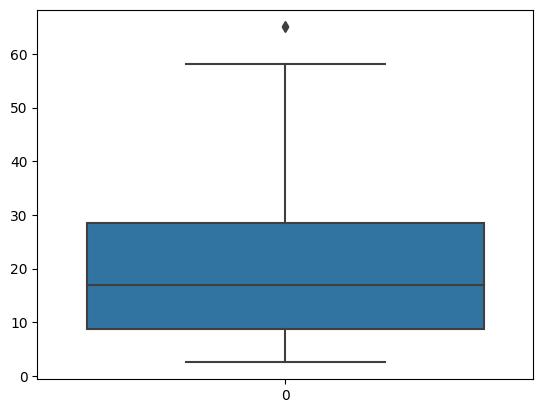

In [38]:
sns.boxplot(df['Global Hunger Index (2021)'])

<AxesSubplot: xlabel='Entity', ylabel='count'>

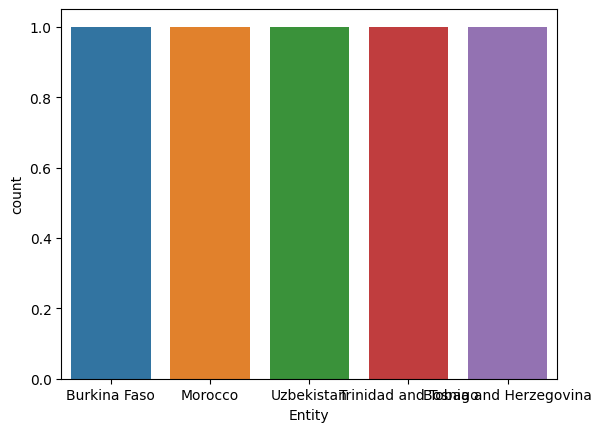

In [292]:
dent=df.sample(5)
#x=Entity(50)
sns.countplot(x='Entity',data=dent)

In [293]:
# df['Entity'].unique()

<AxesSubplot: xlabel='411773-annotations', ylabel='count'>

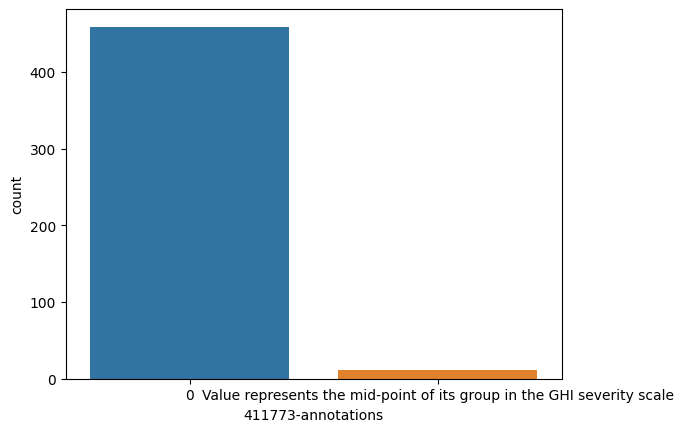

In [294]:

sns.countplot(x='411773-annotations',data=df)

In [295]:
##### BIVARIANT ANALYSIS 
# Involves finding relationships between two variables/attributes.
# To achieve this, we can use bar chart,box plot and regression plots.


<AxesSubplot: xlabel='Entity', ylabel='Global Hunger Index (2021)'>

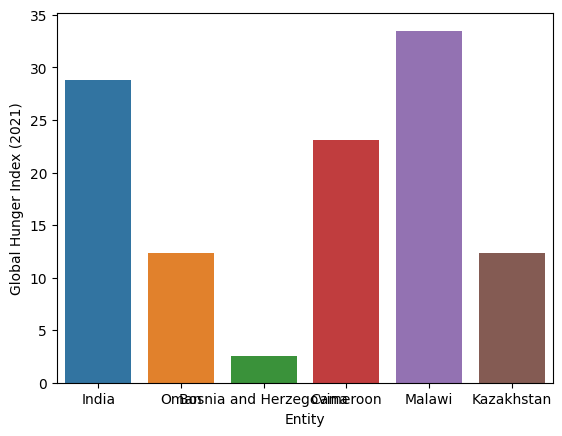

In [296]:
### Bar chart is used when you have one variable as 
#categorial and another variable as numeric. 

dent=df.sample(6)
sns.barplot(x='Entity',y='Global Hunger Index (2021)',data=dent)


<AxesSubplot: xlabel='Entity', ylabel='Global Hunger Index (2021)'>

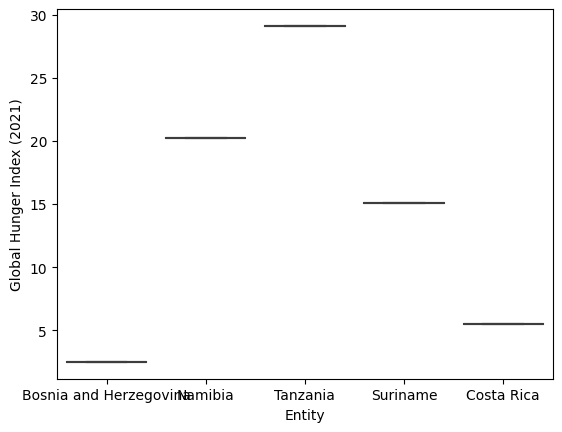

In [297]:
dent=df.sample(5)

sns.boxplot(x='Entity',y='Global Hunger Index (2021)',data=dent)

In [298]:
#####REGRESSION PLOT
# This plot is best suited to visualize the relationship betweenn two
#numeric data variables.


In [299]:
#####MULTIVARIANT ANALYSIS
##This gives us a statistical analysis of many different variables at once


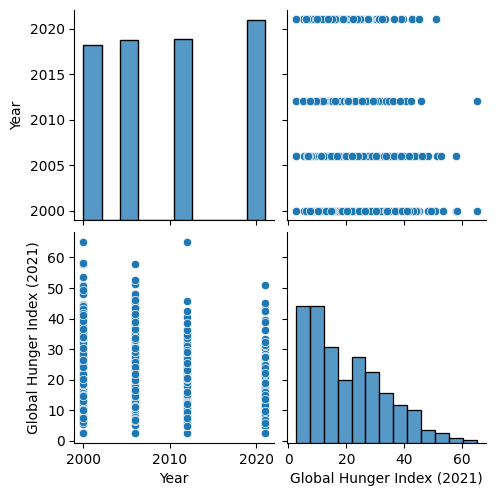

In [300]:


sns.pairplot(df)

In [301]:
##4.Perform hypothesis testing by assuming 2 hypothesis and validate its
#relation using various hypothesis techniques as discussed 
#from our stats lessons. 

## chi-square test



In [322]:
sample=df.describe()
sample

,Year,Global Hunger Index (2021)
count,471.000000,471.000000
mean,2010.127389,19.824628
std,7.852951,13.449570
min,2000.000000,2.500000
25%,2006.000000,8.800000
50%,2012.000000,17.000000
75%,2021.000000,28.550000
max,2021.000000,65.100000


In [323]:
from scipy.stats import shapiro
datatotest=df['Global Hunger Index (2021)']
stat,p=shapiro(datatotest)
print('stat=%.2f,p=%.3f' %(stat,p))
if p>0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.94,p=0.000
Not a normal distribution


In [334]:
df_=df['Global Hunger Index (2021)'].describe()
print(df_)

count    471.000000
mean      19.824628
std       13.449570
min        2.500000
25%        8.800000
50%       17.000000
75%       28.550000
max       65.100000
Name: Global Hunger Index (2021), dtype: float64


In [335]:
stat,p,dof,expected=chi2_contingency(df_)

In [336]:
print(stat)#this is a test statistic value 

0.0


In [337]:
print(p)

1.0


In [338]:
print(dof)#degree of freedom

0


In [339]:
significance_value=0.05 # standard threshold 

if p<=significance_value:
    print('Reject the Null hypothesis (REJECT H0)')
else:
    print('Accept the Null hypothesis (ACCEPT H0)')
   

Accept the Null hypothesis (ACCEPT H0)


In [341]:
###T-test

#one-sample T-test

sample1=df['Year'].describe()
print(sample1)

count     471.000000
mean     2010.127389
std         7.852951
min      2000.000000
25%      2006.000000
50%      2012.000000
75%      2021.000000
max      2021.000000
Name: Year, dtype: float64


In [343]:
print(stats.ttest_1samp(a=sample1, popmean=2010))
#This is a test for the null hypothesis that the expected value (mean) of a sample of 
# independent observations a is equal to the given population mean, popmean.

Ttest_1sampResult(statistic=-1.5046218035365377, pvalue=0.17613485467386886)


In [ ]:
### H0: The mean of year is 2010.127
# H1: The mean of year is not 2010.127

# Here, we have selected the year as 
#the population sample to perform the test on. 

# Since, the p value is close to 1 which is greater than 0.05 ( threshold ) 
#which means that the mean of the year is most likely to be 2010.127
# The evidence is too strong to be rejected, it is almost accurate. So, we accept the H0. 

In [344]:
# #Lets perform two sample T test

sample1=df['Year'].describe()
sample2=df['Global Hunger Index (2021)'].describe()
print(np.var(sample1),np.var(sample2))

602370.4176009452 22352.639503721846


In [345]:
ratio=np.var(sample2)/np.var(sample1)
print(ratio)


0.03710779754547955


In [346]:
# To perform two sample t test, the samples of the populations needs to be symmetrically distrbuted i.e normalized. 
# In this case it is as the ratio value is close to 1 which indicates normal/symmetric distributions.
# If the value was negative, it indicates negative distribution
# If the value was greater than 1.5 closer to 2 or greater than 2 then it indicates positive distribution. 

# Ensure always the data is normalized. 


In [347]:
print(ttest_ind(a=sample1,b=sample2,equal_var=True))

Ttest_indResult(statistic=4.988752136979904, pvalue=0.0001986168142308783)


In [348]:
# H0 - The mean of both samples(year and Global Hunger Index (2021) are equal
# H1 - The mean of both samples are not equal 

# Conclusion- We will dismiss the null hypothesis and accept the alternate hypothesis. 
# There is no evidene sustainable enough to prove the two populations have the same mean. So, H1 is true. 

In [349]:
####5.Perform data cleaning if any and feature engineering, make observations for the same. 


#### Feature engineering - On the existing features, you try to find if new features can 
#be created or exsisting features can be dropped.





In [350]:
## Convert 411773-annotations into float 
dict_={'NAN':0,'Value represents the mid-point of its group in the GHI severity scale':1}
df['411773-annotations']=df['411773-annotations'].map(dict_)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      471 non-null    object 
 1   Code                        471 non-null    object 
 2   Year                        471 non-null    int64  
 3   Global Hunger Index (2021)  471 non-null    float64
 4   411773-annotations          12 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.5+ KB


In [353]:
##drop Code column

In [354]:
df.drop('Code',axis=1,inplace=True)
df.columns

Index(['Entity', 'Year', 'Global Hunger Index (2021)', '411773-annotations'], dtype='object')